<a href="https://colab.research.google.com/github/syedanida/Computer-Vision/blob/main/Part_4_Standard_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))

['train.csv', 'test.csv', 'sample_submission.csv']


In [ ]:
!pip install git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-3bziyqc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-o4df88vi/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from efficientnet import EfficientNetB3

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras import optimizers
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [ ]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

In [ ]:
X_train.shape, test.shape

((42000, 784), (28000, 784))

In [ ]:
# Normilize data
X_train = X_train.astype('float32')
test = test.astype('float32')
X_train /= 255
test /= 255

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [ ]:
X_train3 = np.full((42000, 28, 28, 3), 0.0)

for i, s in enumerate(X_train):
    X_train3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)

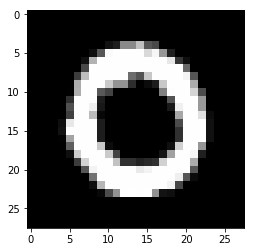

In [ ]:
g = plt.imshow(X_train3[1])

In [ ]:
test3 = np.full((28000, 28, 28, 3), 0.0)

for i, s in enumerate(test):
    test3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)

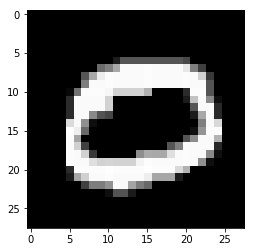

In [ ]:
g = plt.imshow(test3[1])

In [ ]:
X_train3.shape, test3.shape

((42000, 28, 28, 3), (28000, 28, 28, 3))

In [ ]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
model = EfficientNetB3(weights='imagenet', input_shape = (28,28,3), include_top=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
43974656/43966704 [==============================] - 2s 0us/step


In [ ]:
model.trainable = False

In [ ]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_f = Model(input = model.input, output = predictions)
model_f.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [ ]:
%%time
# Train model
history = model_f.fit(X_train3, Y_train,
              epochs=10,
              batch_size = 128,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 60s - loss: 0.8659 - acc: 0.7171 - val_loss: 0.1877 - val_acc: 0.9414
Epoch 2/10
 - 39s - loss: 0.1788 - acc: 0.9471 - val_loss: 0.0758 - val_acc: 0.9774
Epoch 3/10
 - 38s - loss: 0.0909 - acc: 0.9725 - val_loss: 0.0540 - val_acc: 0.9850
Epoch 4/10
 - 39s - loss: 0.0537 - acc: 0.9844 - val_loss: 0.0486 - val_acc: 0.9862
Epoch 5/10
 - 38s - loss: 0.0408 - acc: 0.9876 - val_loss: 0.0443 - val_acc: 0.9864
Epoch 6/10
 - 38s - loss: 0.0290 - acc: 0.9917 - val_loss: 0.0424 - val_acc: 0.9883
Epoch 7/10
 - 38s - loss: 0.0264 - acc: 0.9920 - val_loss: 0.0465 - val_acc: 0.9871
Epoch 8/10
 - 38s - loss: 0.0180 - acc: 0.9947 - val_loss: 0.0408 - val_acc: 0.9881
Epoch 9/10
 - 38s - loss: 0.0174 - acc: 0.9949 - val_loss: 0.0521 - val_acc: 0.9883
Epoch 10/10
 - 39s - loss: 0.0152 - acc: 0.9958 - val_loss: 0.0492 - val_acc: 0.9879
CPU times: user 8min 37s, sys: 1min 48s, total: 10min 25s
Wall

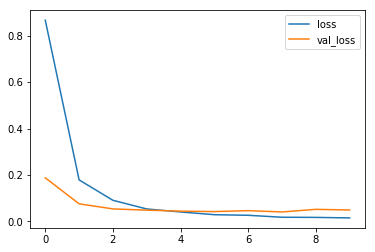

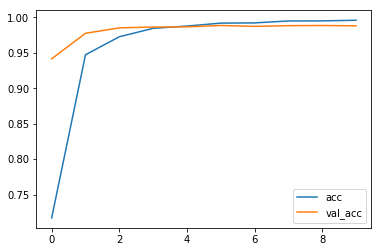

In [ ]:
import json

with open('history.json', 'w') as f:
    json.dump(history.history, f)

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()

In [ ]:
%%time
# Prediction
test_predictions = model_f.predict(test3)

CPU times: user 24.1 s, sys: 1.11 s, total: 25.2 s
Wall time: 20 s


In [ ]:
test_predictions.shape

(28000, 10)

In [ ]:
test_predictions[0]

array([7.2109735e-17, 3.4816974e-16, 1.0000000e+00, 3.1112871e-15,
       2.7101435e-15, 2.5857287e-17, 1.1323145e-15, 2.4761285e-15,
       4.3088964e-15, 4.8764212e-15], dtype=float32)

In [ ]:
# select the index with the maximum probability
results = np.argmax(test_predictions,axis = 1)
results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [ ]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


### **Fashion Mnist**

In [ ]:
!pip install -q efficientnet_pytorch

In [ ]:
import time
import random
import datetime
import os

import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import accuracy_score

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import efficientnet_pytorch
import cv2
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import matplotlib.pyplot as plt

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(2021)

In [ ]:
class DataLoaderConfig:
    batch_size = 64
    num_workers = 8


class TrainConfig:
    criterion = nn.CrossEntropyLoss
    n_epochs = 2
    lr = 0.001
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
    scheduler_params = dict(
        mode='min',
        factor=0.5,
        patience=1,
        verbose=False,
        threshold=0.0001,
        threshold_mode='abs',
        cooldown=0,
        min_lr=1e-8,
        eps=1e-08
    )


DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
print(df.shape)
df.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['label'].values
X = df.drop(['label'], axis=1).values

In [ ]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [ ]:
class DatasetRetriever(Dataset):
    def __init__(self, X, y, transforms=None):
        super().__init__()
        self.X = X.reshape(-1,28,28).astype(np.float32)
        self.y = y
        self.transforms = transforms

    def __getitem__(self, index):
        image, target = self.X[index], self.y[index]
        image = np.stack([image] * 3, axis=-1)
        image /= 255.
        if self.transforms:
            image = self.transforms(image=image)['image']

        return image, torch.tensor(target, dtype=torch.long)

    def __len__(self):
        return self.y.shape[0]

In [ ]:
def get_train_transforms():
    return A.Compose(
        [
            A.Rotate(limit=10, border_mode=cv2.BORDER_REPLICATE, p=0.5),
            A.Cutout(num_holes=8, max_h_size=2, max_w_size=2, fill_value=0, p=0.5),
            A.Cutout(num_holes=8, max_h_size=1, max_w_size=1, fill_value=1, p=0.5),
            A.Resize(28,28, p=1.),
            ToTensorV2(p=1.0),
        ],
        p=1.0)

def get_valid_transforms():
    return A.Compose(
        [
            A.Resize(28,28, p=1.),
            ToTensorV2(p=1.0),
        ],
        p=1.0
    )

In [ ]:
train_dataset = DatasetRetriever(
    X = X_train,
    y = y_train,
    transforms=get_train_transforms(),
)

valid_dataset = DatasetRetriever(
    X = X_valid,
    y = y_valid,
    transforms=get_valid_transforms(),
)

/opt/conda/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:691: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


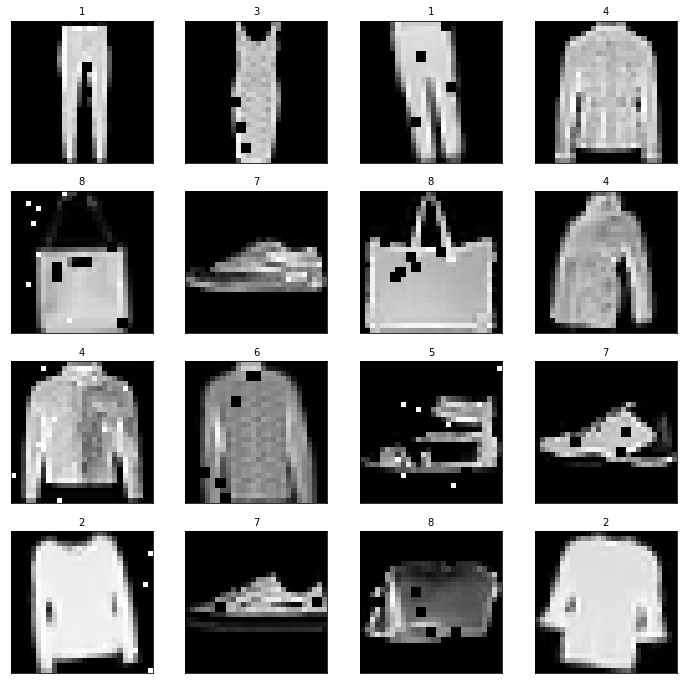

In [ ]:
plt.figure(figsize=(12,12))

for i in range(16):
    image, target = train_dataset[random.randint(0, len(train_dataset))]
    numpy_image = image.permute(1,2,0).cpu().numpy()

    plt.subplot(4,4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(target.cpu().numpy(), fontsize=10)
    plt.imshow(numpy_image);

In [ ]:
train_loader = DataLoader(
    train_dataset,
    batch_size=DataLoaderConfig.batch_size,
    shuffle=True,
    num_workers=DataLoaderConfig.num_workers,
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=DataLoaderConfig.batch_size,
    shuffle=False,
    num_workers=DataLoaderConfig.num_workers,
)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Build Model

In [ ]:
class LossMeter:
    def __init__(self):
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class AccMeter:
    def __init__(self):
        self.true_count = 0
        self.all_count = 0
        self.avg = 0

    def update(self, y_true, y_pred):
        y_true = y_true.cpu().numpy().astype(int)
        y_pred = y_pred.cpu().numpy().argmax(axis=1).astype(int)
        self.true_count += (y_true == y_pred).sum()
        self.all_count += y_true.shape[0]
        self.avg = self.true_count / self.all_count

In [ ]:
class Fitter:
    def __init__(
        self, model, device, criterion, n_epochs,
        lr, sheduler=None, scheduler_params=None
    ):
        self.epoch = 0
        self.n_epochs = n_epochs
        self.base_dir = './'
        self.log_path = f'{self.base_dir}/log.txt'
        self.best_summary_loss = np.inf

        self.model = model
        self.device = device

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)

        if sheduler:
            self.scheduler = sheduler(self.optimizer, **scheduler_params)

        self.criterion = criterion().to(self.device)

        self.log(f'Fitter prepared. Device is {self.device}')

    def fit(self, train_loader, valid_loader):
        for e in range(self.n_epochs):
            current_lr = self.optimizer.param_groups[0]['lr']
            self.log(f'\n{datetime.datetime.utcnow().isoformat()}\nLR: {current_lr}')

            t = int(time.time())
            summary_loss, final_scores = self.train_one_epoch(train_loader)
            self.log(
                f'[RESULT]: Train. Epoch: {self.epoch}, ' + \
                f'summary_loss: {summary_loss.avg:.5f}, ' + \
                f'final_score: {final_scores.avg:.5f}, ' + \
                f'time: {int(time.time()) - t} s'
            )

            t = int(time.time())
            summary_loss, final_scores = self.validation(valid_loader)
            self.log(
                f'[RESULT]: Valid. Epoch: {self.epoch}, ' + \
                f'summary_loss: {summary_loss.avg:.5f}, ' + \
                f'final_score: {final_scores.avg:.5f}, ' + \
                f'time: {int(time.time()) - t} s'
            )

            f_best = 0
            if summary_loss.avg < self.best_summary_loss:
                self.best_summary_loss = summary_loss.avg
                f_best = 1

            self.scheduler.step(metrics=summary_loss.avg)
            self.save(f'{self.base_dir}/last-checkpoint.bin')

            if f_best:
                self.save(f'{self.base_dir}/best-checkpoint.bin')
                print('New best checkpoint')

            self.epoch += 1

    def validation(self, val_loader):
        self.model.eval()
        summary_loss = LossMeter()
        final_scores = AccMeter()

        t = int(time.time())
        for step, (images, targets) in enumerate(val_loader):
            print(
                f'Valid Step {step}/{len(val_loader)}, ' + \
                f'summary_loss: {summary_loss.avg:.5f}, ' + \
                f'final_score: {final_scores.avg:.5f}, ' + \
                f'time: {int(time.time()) - t} s', end='\r'
            )

            with torch.no_grad():
                targets = targets.to(self.device)
                images = images.to(self.device)
                batch_size = images.shape[0]

                outputs = self.model(images)
                loss = self.criterion(outputs, targets)

                final_scores.update(targets, outputs)
                summary_loss.update(loss.detach().item(), batch_size)

        return summary_loss, final_scores

    def train_one_epoch(self, train_loader):
        self.model.train()
        summary_loss = LossMeter()
        final_scores = AccMeter()

        t = int(time.time())
        for step, (images, targets) in enumerate(train_loader):
            print(
                f'Train Step {step}/{len(train_loader)}, ' + \
                f'summary_loss: {summary_loss.avg:.5f}, ' + \
                f'final_score: {final_scores.avg:.5f}, ' + \
                f'time: {int(time.time()) - t} s', end='\r'
            )

            targets = targets.to(self.device)
            images = images.to(self.device)
            batch_size = images.shape[0]

            self.optimizer.zero_grad()
            outputs = self.model(images)

            loss = self.criterion(outputs, targets)
            loss.backward()

            final_scores.update(targets, outputs.detach())
            summary_loss.update(loss.detach().item(), batch_size)

            self.optimizer.step()

        return summary_loss, final_scores

    def save(self, path):
        self.model.eval()
        torch.save({
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'best_summary_loss': self.best_summary_loss,
            'epoch': self.epoch,
        }, path)

    def load(self, path):
        checkpoint = torch.load(path)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        self.best_summary_loss = checkpoint['best_summary_loss']
        self.epoch = checkpoint['epoch'] + 1

    def log(self, message):
        print(message)
        with open(self.log_path, 'a+') as logger:
            logger.write(f'{message}\n')

In [ ]:
def get_net():
    net = efficientnet_pytorch.EfficientNet.from_pretrained('efficientnet-b7')
    net._fc = nn.Linear(in_features=2560, out_features=10, bias=True)
    return net

net = get_net().to(DEVICE)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth


  0%|          | 0.00/254M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b7


In [ ]:
fitter = Fitter(
    model=net,
    device=DEVICE,
    criterion=TrainConfig.criterion,
    n_epochs=TrainConfig.n_epochs,
    lr=TrainConfig.lr,
    sheduler=TrainConfig.scheduler,
    scheduler_params=TrainConfig.scheduler_params
)

Fitter prepared. Device is cpu


In [ ]:
fitter.fit(train_loader, valid_loader)


2021-10-26T15:04:50.730741
LR: 0.001
[RESULT]: Train. Epoch: 0, summary_loss: 0.52024, final_score: 0.82525, time: 3329 s
[RESULT]: Valid. Epoch: 0, summary_loss: 0.33245, final_score: 0.88933, time: 158 s
New best checkpoint

2021-10-26T16:03:00.518133
LR: 0.001
[RESULT]: Train. Epoch: 1, summary_loss: 0.35073, final_score: 0.88256, time: 3374 s
[RESULT]: Valid. Epoch: 1, summary_loss: 0.25645, final_score: 0.91083, time: 160 s
New best checkpoint


## Inference Model

In [ ]:
checkpoint = torch.load('../working/best-checkpoint.bin')
net.load_state_dict(checkpoint['model_state_dict']);
net.eval();

In [ ]:
dfT = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')
print(dfT.shape)
dfT.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = dfT.iloc[:,1:].values
y = dfT.iloc[:,0].values

In [ ]:
class DatasetRetriever(Dataset):
    def __init__(self, X, transforms=None):
        super().__init__()
        self.X = X.reshape(-1, 28,28).astype(np.float32)
        self.transforms = transforms

    def __getitem__(self, index):
        image = self.X[index]
        image = np.stack([image] * 3, axis=-1)
        image /= 255.
        if self.transforms:
            image = self.transforms(image=image)['image']

        return image

    def __len__(self):
        return self.X.shape[0]

In [ ]:
test_dataset = DatasetRetriever(
    X = X,
    transforms=get_valid_transforms(),
)

In [ ]:
test_loader = DataLoader(
    test_dataset,
    batch_size=DataLoaderConfig.batch_size,
    shuffle=False,
    num_workers=DataLoaderConfig.num_workers
)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
result = []
for step, images in enumerate(test_loader):
    print(step, end='\r')
    y_pred = net(images.to(DEVICE)).detach().cpu().numpy().argmax(axis=1).astype(int)
    result.extend(y_pred)

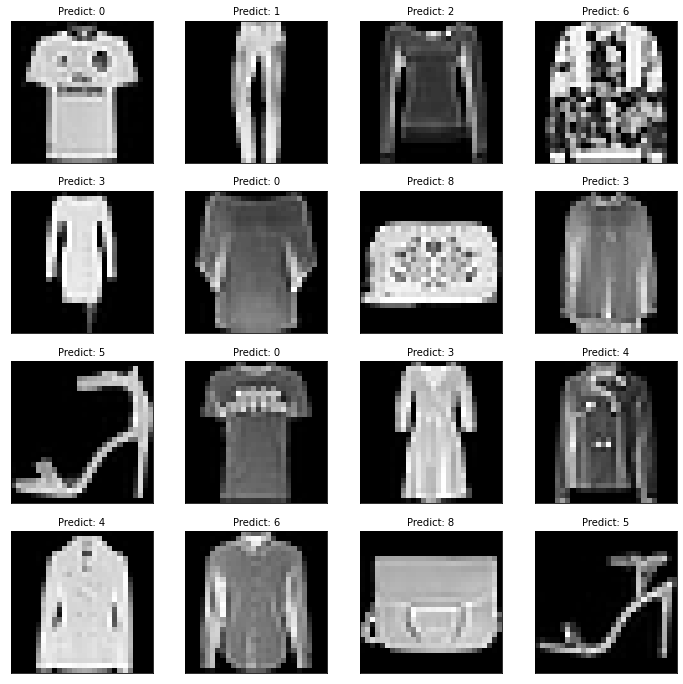

In [ ]:
plt.figure(figsize=(12,12))

for i in range(16):
    image = test_dataset[i]
    numpy_image = image.permute(1,2,0).cpu().numpy()

    plt.subplot(4,4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Predict: {result[i]}', fontsize=10)
    plt.imshow(numpy_image);

In [ ]:
ANS=y
PRED=result
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9088


CIFAR-10

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# to use efficientnet v2 in keras.applications, upgrade tensorflow to ver 2.8
!pip install -U tensorflow==2.8.3
!apt install --yes --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.9/497.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorbo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout, Activation, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import efficientnet_v2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [ ]:
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
train_data = train_data.astype("float32")
test_data = test_data.astype("float32")
#EfficientNetV2 models expect their inputs to be float tensors of pixels with values in the [0-255] range.

170508288/170498071 [==============================] - 12s 0us/step


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_label, random_state=seed, shuffle=True)

In [ ]:
train_gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_gen.flow(X_train, y_train, batch_size=32)

In [ ]:
input_shape = (32, 32, 3) #Cifar10 image size
resized_shape = (224, 224, 3) #EfficientNetV2B0 model input shape
num_classes = 10

def build_model():
    inputs = Input(shape=input_shape)
    x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, resized_shape[:2]))(inputs) #Resize image to  size 224x224
    base_model = efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=resized_shape, weights="imagenet")
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model = build_model()

plateau = ReduceLROnPlateau(monitor="val_loss", factor=0.7, patience=1, verbose=1)
earlystopping = EarlyStopping(monitor="val_loss", patience=3, verbose=1)

model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()
print("\n")

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[plateau, earlystopping]
                   )
print("\nTest Accuracy: ", accuracy_score(np.argmax(test_label, axis=1), np.argmax(model.predict(test_data), axis=1)))

24289280/24274472 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                              

2022-12-23 15:42:14.780067: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1172/1172 [==============================] - ETA: 0s - loss: 0.5387 - accuracy: 0.8177

2022-12-23 15:44:25.649159: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 153600000 exceeds 10% of free system memory.
2022-12-23 15:44:25.905360: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 153600000 exceeds 10% of free system memory.


1172/1172 [==============================] - 153s 121ms/step - loss: 0.5387 - accuracy: 0.8177 - val_loss: 0.1840 - val_accuracy: 0.9389 - lr: 0.0100
Epoch 2/20
1172/1172 [==============================] - 139s 119ms/step - loss: 0.2553 - accuracy: 0.9136 - val_loss: 0.1435 - val_accuracy: 0.9495 - lr: 0.0100
Epoch 3/20
1172/1172 [==============================] - 138s 117ms/step - loss: 0.1777 - accuracy: 0.9393 - val_loss: 0.1355 - val_accuracy: 0.9530 - lr: 0.0100
Epoch 4/20
1172/1172 [==============================] - 148s 126ms/step - loss: 0.1430 - accuracy: 0.9509 - val_loss: 0.1238 - val_accuracy: 0.9602 - lr: 0.0100
Epoch 5/20
1172/1172 [==============================] - 139s 119ms/step - loss: 0.1154 - accuracy: 0.9598 - val_loss: 0.1182 - val_accuracy: 0.9586 - lr: 0.0100
Epoch 6/20
1172/1172 [==============================] - ETA: 0s - loss: 0.0931 - accuracy: 0.9683
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.006999999843537807.
1172/1172 [======================

2022-12-23 16:32:05.843329: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.
2022-12-23 16:32:06.040485: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.



Test Accuracy:  0.9715


**Plot learning history**

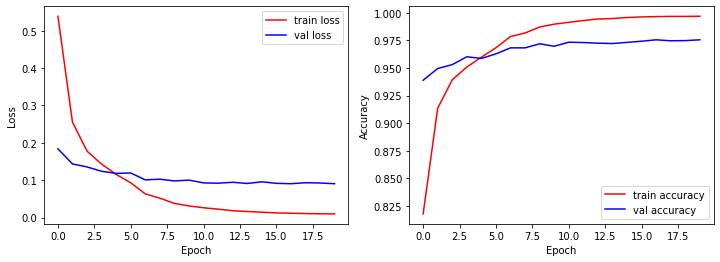

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
ax[0].plot(history.history["loss"], c="r", label="train loss")
ax[0].plot(history.history["val_loss"], c="b", label="val loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], c="r", label="train accuracy")
ax[1].plot(history.history["val_accuracy"], c="b", label="val accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

### **Comparisons between EfficientNet, BiT, MLP-Mixer, and ConvNeXt**

In [ ]:
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

# we can load a custom dataset using the "imagefolder" feature
# details: https://huggingface.co/docs/datasets/image_process#imagefolder
# supports far more than just zip files
dataset = load_dataset("imagefolder", data_files="/content/EuroSAT_RGB.zip")

In [ ]:
dataset["train"].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'], id=None)}

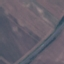

In [ ]:
example = dataset["train"][0]
example["image"]

In [ ]:
example["label"]

3

In [ ]:
labels = dataset["train"].features["label"].names
print(labels)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [ ]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
print(id2label)

{0: 'AnnualCrop', 1: 'Forest', 2: 'HerbaceousVegetation', 3: 'Highway', 4: 'Industrial', 5: 'Pasture', 6: 'PermanentCrop', 7: 'Residential', 8: 'River', 9: 'SeaLake'}


In [ ]:
id2label[3]

'Highway'

In [ ]:
from datasets import load_dataset

dataset = load_dataset("nielsr/eurosat-demo")

Generating train split:   0%|          | 0/27000 [00:00<?, ? examples/s]

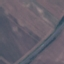

In [ ]:
dataset["train"][0]["image"]

In [ ]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("facebook/convnext-tiny-224")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [ ]:
print(image_processor)

ConvNextImageProcessor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}



In [ ]:
from torchvision.transforms import (
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    ToTensor,
)

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)

transform = Compose(
    [
     RandomResizedCrop(image_processor.size["shortest_edge"]),
     RandomHorizontalFlip(),
     ToTensor(),
     normalize
    ]
)

def train_transforms(examples):
  examples["pixel_values"] = [transform(image.convert("RGB")) for image in examples["image"]]

  return examples

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 27000
    })
})

In [ ]:
processed_dataset = dataset.with_transform(train_transforms)

In [ ]:
processed_dataset["train"][0].keys()

dict_keys(['image', 'label', 'pixel_values'])

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(examples):
  pixel_values = torch.stack([example["pixel_values"] for example in examples])
  labels = torch.tensor([example["label"] for example in examples])

  return {"pixel_values": pixel_values, "labels": labels}

dataloader = DataLoader(processed_dataset["train"], collate_fn=collate_fn, batch_size=4, shuffle=True)

In [ ]:
batch = next(iter(dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


In [ ]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained("facebook/convnext-tiny-224",
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        ignore_mismatched_sizes=True)

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/114M [00:00<?, ?B/s]

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-tiny-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tqdm.notebook import tqdm
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# move model to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(10):
  print("Epoch:", epoch)
  correct = 0
  total = 0
  for idx, batch in enumerate(tqdm(dataloader)):
    # move batch to GPU
    batch = {k:v.to(device) for k,v in batch.items()}

    optimizer.zero_grad()

    # forward pass
    outputs = model(pixel_values=batch["pixel_values"],
                    labels=batch["labels"])

    loss, logits = outputs.loss, outputs.logits
    loss.backward()
    optimizer.step()

    # metrics
    total += batch["labels"].shape[0]
    predicted = logits.argmax(-1)
    correct += (predicted == batch["labels"]).sum().item()

    accuracy = correct/total

    if idx % 100 == 0:
      print(f"Loss after {idx} steps:", loss.item())
      print(f"Accuracy after {idx} steps:", accuracy)

In [ ]:
repo_name = "nielsr/convnext-tiny-finetuned-eurosat"

model.push_to_hub(repo_name)
image_processor.push_to_hub(repo_name)

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:1004: FutureWarning: `create_repo` now takes `token` as an optional positional argument. Be sure to adapt your code!
  FutureWarning,
Cloning https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat into local empty directory.


Upload file pytorch_model.bin:   0%|          | 3.34k/106M [00:00<?, ?B/s]

To https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat
   73b78e0..7a2e6c0  main -> main

To https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat
   7a2e6c0..4f3580e  main -> main



'https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat/commit/4f3580e91046d22e9917fd94a2a36e23314e80fd'

In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

feature_extractor = AutoImageProcessor.from_pretrained("nielsr/convnext-tiny-finetuned-eurosat")
model = AutoModelForImageClassification.from_pretrained("nielsr/convnext-tiny-finetuned-eurosat")

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/111M [00:00<?, ?B/s]

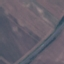

In [ ]:
test_example = dataset["train"][0]

test_image = test_example["image"].convert("RGB")
test_image

In [ ]:
pixel_values = image_processor(test_image, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)
  logits = outputs.logits

In [ ]:
print(logits.shape)

torch.Size([1, 10])


In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print(model.config.id2label[predicted_class_idx])

Highway


In [ ]:
from transformers import pipeline

pipe = pipeline(model="nielsr/convnext-tiny-finetuned-eurosat")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [ ]:
pipe(test_image)

[{'label': 'Highway', 'score': 0.9996901750564575},
 {'label': 'River', 'score': 0.00015031074872240424},
 {'label': 'AnnualCrop', 'score': 4.87822326249443e-05},
 {'label': 'PermanentCrop', 'score': 3.893173561664298e-05},
 {'label': 'Industrial', 'score': 2.9273147447383963e-05}]